In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN

## Define Functions

In [2]:
def sketch_image(x, y):
    plt.scatter(x=x, y=y, color='black', s=10, marker='.')
    plt.xlabel('X1', fontsize=10)
    plt.ylabel('X2', fontsize=10)
    plt.grid(visible=True, alpha=0.3, linestyle='--')
    plt.show()

In [3]:
def plot_image(x, y, c):
    plt.scatter(x=x, y=y, c=c, s=10, cmap='tab20', marker='o')
    plt.xlabel('X1', fontsize=10)
    plt.ylabel('Y1', fontsize=10)
    plt.grid(visible=True, alpha=0.3, linestyle='--')
    plt.show()

In [4]:
def kmeans_algorithm(a, b, nc):
    array = np.column_stack([a, b])
    kmeans = KMeans(n_clusters=nc, random_state=0).fit(array)
    k_labels = kmeans.labels_
    k_clusters = kmeans.cluster_centers_
    return k_labels

In [5]:
def dbscan_algorithm(a, b, ms, eps=0.5):
    array = np.column_stack([a, b])
    dbscan = DBSCAN(eps=eps, min_samples=5, metric='euclidean', algorithm='ball_tree').fit(array)
    d_labels = dbscan.labels_
    return d_labels

## Kmeans Algorithm

### Sketch with Data_1

In [6]:
data1 = pd.read_csv('Data_1.csv')
data1.head()

,x1,x2
0,0.52,4.860
1,1.69,0.206
2,1.36,4.360
3,-1.57,3.020
4,-1.64,2.380


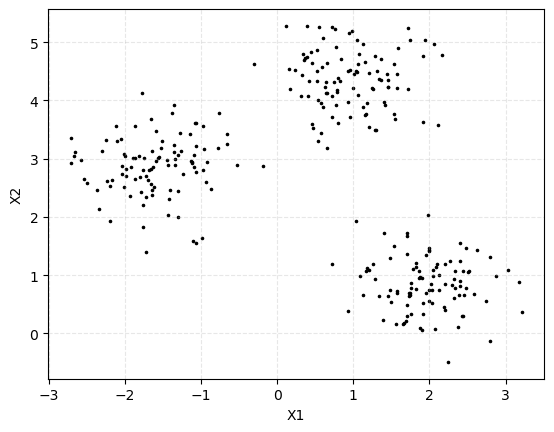

In [7]:
sketch_image(x=data1['x1'], y=data1['x2'])

### Plot with Data_1

/home/htetaunglynn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


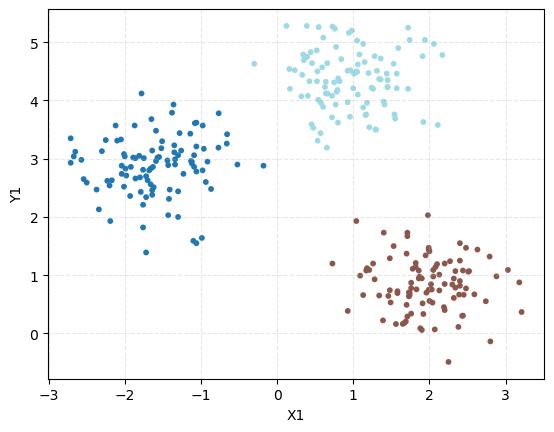

In [8]:
n_clusters = 3
labels = kmeans_algorithm(a=data1['x1'], b=data1['x2'], nc=n_clusters)
plot_image(x=data1['x1'], y=data1['x2'], c=labels)

### Sketch with Data_2

In [9]:
data2 = pd.read_csv('Data_2.csv')
data2.head()

,x1,x2
0,-1.670,3.810
1,0.945,-0.902
2,-0.959,2.860
3,-2.190,3.570
4,-1.970,3.070


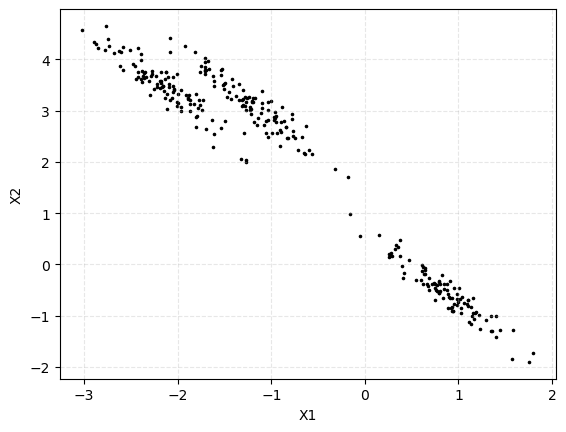

In [10]:
sketch_image(x=data2['x1'], y=data2['x2'])

### Plot with Data_2

/home/htetaunglynn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


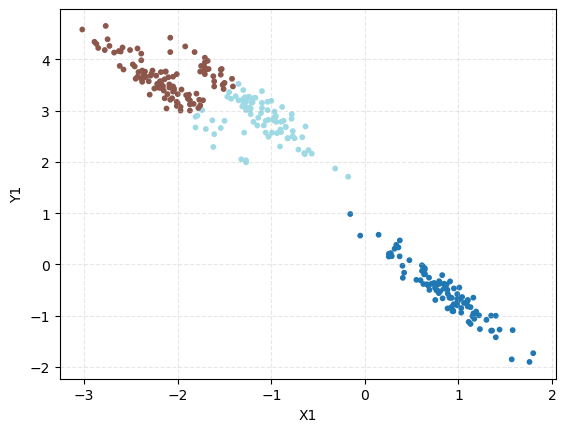

In [11]:
n_clusters = 3
labels = kmeans_algorithm(a=data2['x1'], b=data2['x2'], nc=n_clusters)
plot_image(x=data2['x1'], y=data2['x2'], c=labels)

## DBSCAN Algorithm

### Plot with Data_2

In [12]:
data2 = pd.read_csv('Data_2.csv')
data2.head()

,x1,x2
0,-1.670,3.810
1,0.945,-0.902
2,-0.959,2.860
3,-2.190,3.570
4,-1.970,3.070


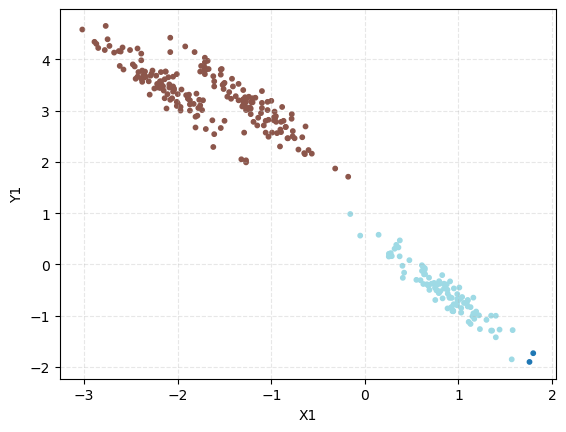

In [13]:
min_samples = 5
d_labels = dbscan_algorithm(a=data2['x1'], b=data2['x2'], ms=min_samples)
plot_image(x=data2['x1'], y=data2['x2'], c=d_labels)

### Sketch with Data_3

In [14]:
data3 = pd.read_csv('Data_3.csv')
data3.head()

,x1,x2
0,0.268,-0.171
1,0.418,0.873
2,-0.014,1.010
3,0.532,0.829
4,0.172,0.180


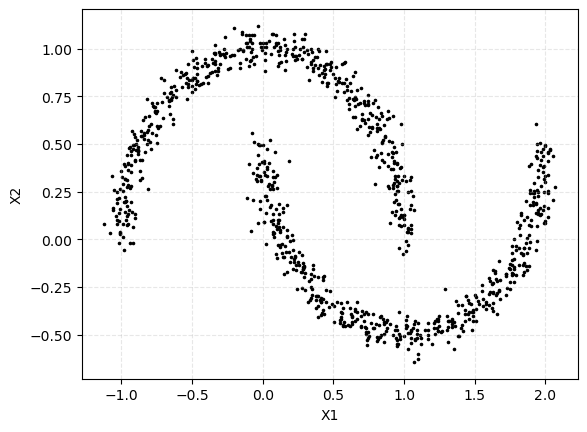

In [15]:
sketch_image(data3['x1'], data3['x2'])

### Plot with Data_3

#### Using Kmeans

/home/htetaunglynn/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


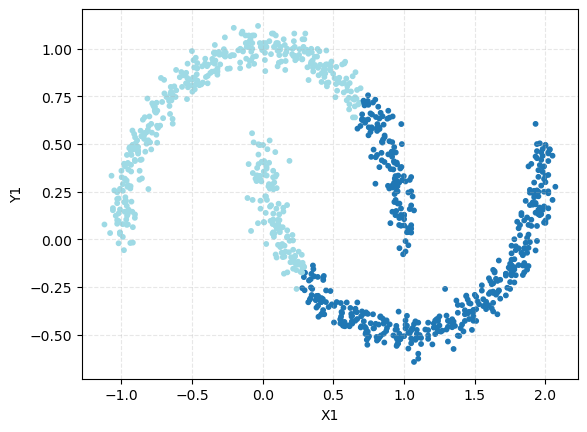

In [16]:
n_clusters = 2
labels = kmeans_algorithm(a=data3['x1'], b=data3['x2'], nc=2)
plot_image(x=data3['x1'], y=data3['x2'], c=labels)

#### Using DBSCAN

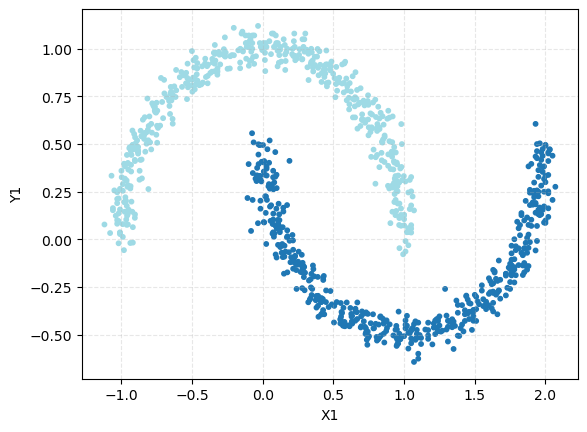

In [17]:
# Hyper-parameters of DBSCAN algorithm
eps = 0.3
min_samples = 1
labels = dbscan_algorithm(a=data3['x1'], b=data3['x2'], ms=min_samples, eps=eps)
plot_image(x=data3['x1'], y=data3['x2'], c=labels)

In [18]:
# Counter number of clusters in labels
print(set(labels))
no_of_clusters = len(set(labels)) - (1 if -1 in labels else 0)
no_of_clusters

{0, 1}


2

In [19]:
# Counter number of noise points
list(labels).count(-1) # count number of occurrance of value "-1"

0

### Sketch with Data_5

In [20]:
data5 = pd.read_csv('Data_5.csv')
data5.shape

(300, 2)

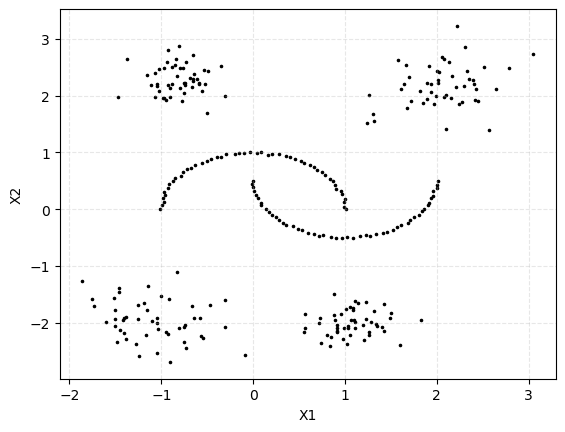

In [21]:
sketch_image(x=data5['x1'], y=data5['x2'])

### Plot with Data_5

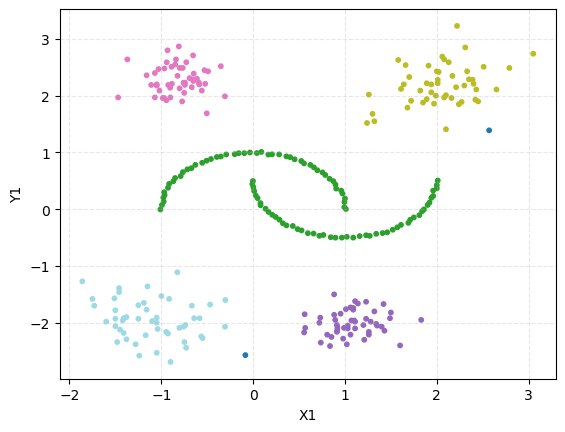

In [34]:
eps = 0.49
min_samples = 1
labels = dbscan_algorithm(a=data5['x1'], b=data5['x2'], ms=min_samples, eps=eps)
plot_image(x=data5['x1'], y=data5['x2'], c=labels)

In [23]:
no_of_clusters = len(set(labels)) - (1 if -1 in labels else 0)
no_of_clusters

6

With _**different density data**_, DBSCAN _**cannot work**_ properly.

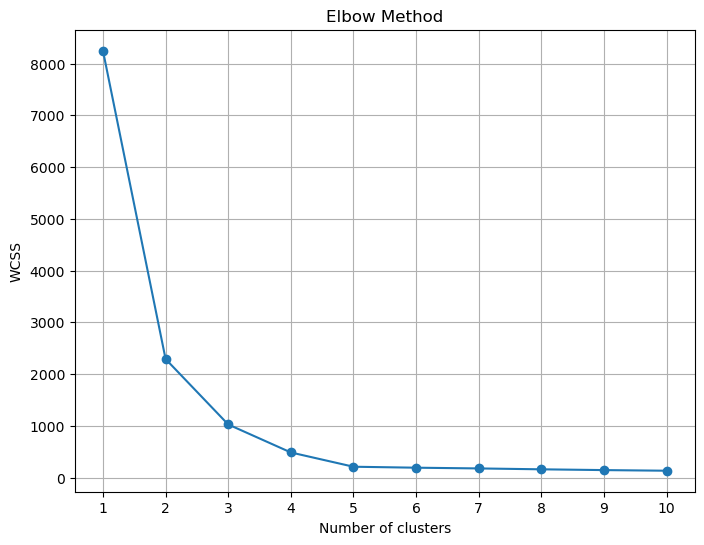

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate sample data
X, _ = make_blobs(n_samples=300, centers=5, cluster_std=0.60, random_state=0)

# Implementing the Elbow Method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='-')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.xticks(np.arange(1, 11, 1))
plt.grid(True)
plt.show()
